## Columbia University
### ECBM E4040 Neural Networks and Deep Learning. Fall 2019.

# Task 1: XOR

In [11]:
# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
from numpy.random import shuffle
import time
import matplotlib.pyplot as plt

# Plot configurations
%matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 1, Part 1: Backpropagation through time (BPTT)

**Question:** Consider a simple RNN network shown in the following figure, where _wx, wh, b1, w, b2_ are the scalar parameters of the network. The loss function is the **mean squared error (MSE)**. Given input _(x1, x2) = (-1, 0)_, ground truth _(g1, g2) = (1, 0), h0 = 0, (wx, wh, b1, w, b2) = (2, 1, 1, 2, 1)_, compute _(dwx, dwh, db1, dw, db2)_, which are the gradients of loss with repect to 5 parameters _(wx, wh, b1, w, b2)_.

![bptt](./img/bptt2.jpg)

<span style="color:red">TODO:</span>

Answer the above question. 

* **[fill in here: 
**Feedforward:**  
$h_1 = \sigma(w_xx_1 + w_hh_0 + b_1) = 0.2689$  
$h_2 = \sigma(w_xx_2 + w_hh_1 + b_1) = 0.7806$  
$y_1 = \sigma(wh_1 + b_2) = 0.8232$ 
$y_2 = \sigma(wh_2 + b_2) = 0.9283$

**Backpropagation:**  
$$dw = g_1\frac{\partial y_1}{\partial w}+ g_2\frac{\partial y_2}{\partial w} = g_1 \sigma(wh_1 + b_2)(1-\sigma(wh_1 + b_2)) h_1+g_2 \sigma(wh_2 + b_2)(1-\sigma(wh_2 + b_2)) h_2 = 0.0413$$
$$db_2 = g_1\frac{\partial y_1}{\partial b_2}+ g_2\frac{\partial y_2}{\partial b_2} = g_1 \sigma(wh_1 + b_2)(1-\sigma(wh_1 + b_2))+g_2 \sigma(wh_2 + b_2)(1-\sigma(wh_2 + b_2)) = 0.0360$$
$db_1 = g_1\frac{\partial y_1}{\partial h_1}\frac{\partial h_1}{\partial b_1}+ g_2\frac{\partial y_2}{\partial h_2}\frac{\partial h_2}{\partial b_1} = g_1\sigma(wh_1 + b_2)(1-\sigma(wh_1 + b_2))w\sigma(w_xx_1 + w_hh_0 + b_1)(1-\sigma(w_xx_1 + w_hh_0 + b_1))+g_2 \sigma(wh_2 + b_2)(1-\sigma(wh_2 + b_2))w\sigma(w_xx_2 + w_hh_1 + b_1)(1-\sigma(w_xx_2 + w_hh_1 + b_1)) = 0.0060$  
$dw_x = g_1\frac{\partial y_1}{\partial h_1}\frac{\partial h_1}{\partial w_x}+ g_2\frac{\partial y_2}{\partial h_2}\frac{\partial h_2}{\partial w_x} = g_1\sigma(wh_1 + b_2) (1-\sigma(wh_1 + b_2) )w\sigma(w_xx_1 + w_hh_0 + b_1)(1-\sigma(w_xx_1 + w_hh_0 + b_1))x_1+g_2 \sigma(wh_2 + b_2)(1-\sigma(wh_2 + b_2))w\sigma(w_xx_2 + w_hh_1 + b_1)(1-\sigma(w_xx_2 + w_hh_1 + b_1))x_2 = 0.0057$  
$dw_h = g_1\frac{\partial y_1}{\partial h_1}\frac{\partial h_1}{\partial w_h}+ g_2\frac{\partial y_2}{\partial h_2}\frac{\partial h_2}{\partial w_h} = g_1\sigma(wh_1 + b_2)(1-\sigma(wh_1 + b_2))w\sigma(w_xx_1 + w_hh_0 + b_1)(1-\sigma(w_xx_1 + w_hh_0 + b_1))h_0+g_2 \sigma(wh_2 + b_2)(1-\sigma(wh_2 + b_2))w\sigma(w_xx_2 + w_hh_1 + b_1)(1-\sigma(w_xx_2 + w_hh_1 + b_1))h_1 = 0.0152$  
]**
* You can use LATEX to edit the equations, and Jupyter notebook can recognize basic LATEX syntax. Alternatively, you can edit equations in some other environment and then paste the screenshot of the equations here.

In [12]:
# use tensorflow to verify the answer.
w = tf.Variable(2.0)
b2 = tf.Variable(1.0)
wx = tf.Variable(2.0)
wh = tf.Variable(1.0)
b1 = tf.Variable(1.0)

h0 = tf.Variable(0.0)
x = tf.placeholder(tf.float32, shape=(2,))
g = tf.placeholder(tf.float32, shape=(2,))

y = []
h1 = tf.sigmoid(wx*x[0] + wh*h0 + b1)
y.append(tf.sigmoid(w*h1 + b2))
h2 = tf.sigmoid(wx*x[1] + wh*h1 + b1)
y.append(tf.sigmoid(w*h2 + b2))

loss = 0.5*(tf.square(g[0]-y[0]) + tf.square(g[1]-y[1]))

dw, db2, dwx, dwh, db1 = tf.gradients(loss, [w, b2, wx, wh, b1])

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    dw_t, db2_t, dwx_t, dwh_t, db1_t = sess.run([dw, db2, dwx, dwh, db1],
                                              feed_dict={x: np.asarray([-1.0,0.0]), g: np.asarray([1.0,0.0])})
print("verify by tensorflow")
print("dw = {:.4f}, db2 = {:.4f}, dwx = {:.4f}, dwh = {:.4f}, db1 = {:.4f}".format(dw_t, db2_t, dwx_t, dwh_t, db1_t))

verify by tensorflow
dw = 0.0413, db2 = 0.0360, dwx = 0.0060, dwh = 0.0057, db1 = 0.0152


## Task 1, Part 2: Use tensorflow modules to create XOR network

In this part, you need to build and train an XOR network that can learn the XOR function. It is a very simple implementation of RNN and will give you an idea how RNN is built and how to train it.

### XOR network

XOR network can learn the XOR $\oplus$ function

As shown in the figure below, and for instance, if input $(x0, x1, x2)$=(1,0,0), then output $(y1, y2, y3)$=(1,1,1). That is, $y_n = x_0\oplus x_1 \oplus ... \oplus x_{n-1}$

![xor_net](./img/xor.png)

### Create data set
This function provides you the way to generate the data which is required for the training process. You should utilize it when building your training function for the GRU. Please read the source code for more information.

In [13]:
from utils.xor.dataset import create_dataset

### (Demo) Build a network using a Tensorlow LSTMCell and GRUCell
This section shows an example how to build a RNN network using an LSTM cell or GRU cell. Both LSTM and GRU cell are inbuilt classes in tensorflow which separately implement the real behavior of the LSTM and GRU neuron. 

Reference: 
1. [TensorFlow LSTM cell](https://www.tensorflow.org/api_docs/python/tf/nn/rnn_cell/LSTMCell)
1. [TensorFlow GRU cell](https://www.tensorflow.org/api_docs/python/tf/nn/rnn_cell/GRUCell)
2. [Understanding GRU networks](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be)

#### LSTM

In [14]:
from tensorflow.contrib.rnn import LSTMCell

# define LSTM cell
lstm_units = 64
cell = LSTMCell(lstm_units,num_proj=2,state_is_tuple=True)


tf.reset_default_graph()

# Input shape: (num_samples, seq_length, input_dimension)
# Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1.
input_data = tf.placeholder(tf.float32, shape=[None,None,1])
output_data = tf.placeholder(tf.int64, shape=[None,None])

# create LSTM network: you can also choose other modules provided by tensorflow, like static_rnn etc.
hidden, _ = tf.nn.dynamic_rnn(cell, input_data, dtype=tf.float32)

# generate output from the hidden information
output_shape = 2
out = tf.layers.dense(hidden, output_shape)
pred = tf.argmax(out, axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))

# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

# accuracy
correct_num = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct_num,tf.float32))

#### GRU

In [15]:
from tensorflow.contrib.rnn import GRUCell

# define GRU cell
gru_units = 64
cell = GRUCell(gru_units)


tf.reset_default_graph()

# Input shape: (num_samples, seq_length, input_dimension)
# Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1.
input_data = tf.placeholder(tf.float32, shape=[None,None,1])
output_data = tf.placeholder(tf.int64, shape=[None,None])

# create GRU network: you can also choose other modules provided by tensorflow, like static_rnn etc.
hidden, _ = tf.nn.dynamic_rnn(cell, input_data, dtype=tf.float32)

# generate output from the hidden information
output_shape = 2
out = tf.layers.dense(hidden, output_shape)
pred = tf.argmax(out, axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))

# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

# accuracy
correct_num = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct_num,tf.float32))

### Training 

<span style='color:red'>TODO:</span> 
1. Build your training function for RNN (choose either LSTM or GRU); 
2. Plot the cost during the training

In [16]:
# TODO: training
from matplotlib import pyplot as plt
X_train,y_train = create_dataset(10000,12)

los = np.zeros(10)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for itr in range(100):
        _,accur,lost= sess.run([optimizer,accuracy, loss], feed_dict={input_data: X_train,
                                                                output_data: y_train})
        if itr%10==0:
            los[int(itr/10)] =lost
            print("loss: {} training accuracy : {}%".format(lost,accur*100))

sess.close()

loss: 0.6927433609962463 training accuracy : 59.03416872024536%
loss: 0.6979199647903442 training accuracy : 50.12999773025513%
loss: 0.6943346261978149 training accuracy : 50.304168462753296%
loss: 0.6762685179710388 training accuracy : 55.50583600997925%
loss: 0.5120086669921875 training accuracy : 81.07583522796631%
loss: 0.023221690207719803 training accuracy : 99.857497215271%
loss: 0.0060655963607132435 training accuracy : 99.98916387557983%
loss: 0.0022514881566166878 training accuracy : 100.0%
loss: 0.000769636535551399 training accuracy : 100.0%
loss: 0.0004718329000752419 training accuracy : 100.0%


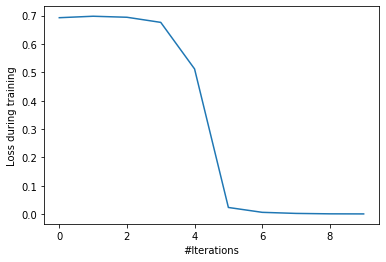

In [17]:
# TODO: plot loss history
plt.plot(range(10),los)
plt.ylabel('Loss during training')
plt.xlabel('#Iterations')
plt.show()

## Task 1, Part 3 :  Build your own LSTMCell
In this part, you need to build your own LSTM cell to achieve the LSTM functionality. 

<span style="color:red">TODO:</span> 
1. Finish class **MyLSTMCell** in utils/xor/rnn.py;
2. Write the training function for your RNN;
3. Plot the cost during training.

In [84]:
from utils.xor.rnn import MyLSTMCell

In [85]:
# recreate xor netowrk with your own LSTM cell
tf.reset_default_graph()

#Input shape: (num_samples,seq_length,input_dimension)
#Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1. 
input_data = tf.placeholder(tf.float32,shape=[None,None,1])
output_data = tf.placeholder(tf.int64,shape=[None,None])

# recreate xor netowrk with your own LSTM cell
lstm_units = 64
cell = MyLSTMCell(lstm_units,num_proj=2)

# create GRU network: you can also choose other modules provided by tensorflow, like static_rnn etc.
hidden, _ = tf.nn.dynamic_rnn(cell,input_data,dtype=tf.float32)

# generate output from the hidden information
output_shape = 2
out = tf.layers.dense(hidden, output_shape)
pred = tf.argmax(out,axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))
# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)
# accuracy
correct = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

### Training

loss: 0.713576078414917 training accuracy : 49.79499876499176%
loss: 0.7300189733505249 training accuracy : 49.87500011920929%
loss: 0.6649295091629028 training accuracy : 55.648332834243774%
loss: 0.6396694779396057 training accuracy : 53.8308322429657%
loss: 0.6294136047363281 training accuracy : 55.94249963760376%
loss: 0.6114687323570251 training accuracy : 61.07416749000549%
loss: 0.48837026953697205 training accuracy : 82.35750198364258%
loss: 0.5167834758758545 training accuracy : 78.3466637134552%
loss: 0.03617230802774429 training accuracy : 99.6583342552185%
loss: 0.004988550674170256 training accuracy : 100.0%
loss: 0.0019366374472156167 training accuracy : 100.0%
loss: 0.0010119264479726553 training accuracy : 100.0%
loss: 0.0007528034038841724 training accuracy : 100.0%
loss: 0.0006370222545228899 training accuracy : 100.0%
loss: 0.000569162773899734 training accuracy : 100.0%
loss: 0.0005207969225011766 training accuracy : 100.0%
loss: 0.0004822749178856611 training accur

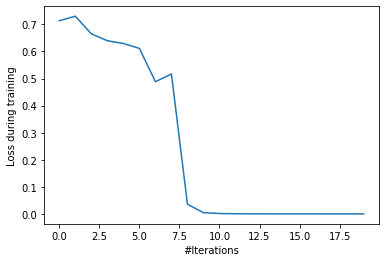

In [88]:
# TODO: plot loss history
los = np.zeros(int(20))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for itr in range(200):
        _,accur,lost = sess.run([optimizer,accuracy, loss], feed_dict={input_data: X_train,
                                                                output_data: y_train})
        if itr%10==0:
            los[int(itr/10)]=lost
            print("loss: {} training accuracy : {}%".format(lost,accur*100))

sess.close()
plt.plot(range(20),los)
plt.ylabel('Loss during training')
plt.xlabel('#Iterations')
plt.show()

In [83]:
# TODO: training